In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [52]:
df = pd.read_csv('ai_job_trends_dataset.csv')

In [53]:
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


# Data Understanding

In [54]:
df.shape

(30000, 13)

In [55]:
df.isnull().sum()

,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [58]:
df.corr(numeric_only=True)

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
Median Salary (USD),1.000000,0.003302,-0.000803,-0.000230,-0.003844,0.007980,0.011688
Experience Required (Years),0.003302,1.000000,-0.001322,0.002285,0.007859,0.006541,-0.006006
Job Openings (2024),-0.000803,-0.001322,1.000000,-0.002536,-0.002111,0.003284,0.003733
Projected Openings (2030),-0.000230,0.002285,-0.002536,1.000000,-0.002334,0.007434,0.009539
Remote Work Ratio (%),-0.003844,0.007859,-0.002111,-0.002334,1.000000,0.004851,0.008988
Automation Risk (%),0.007980,0.006541,0.003284,0.007434,0.004851,1.000000,-0.003737
Gender Diversity (%),0.011688,-0.006006,0.003733,0.009539,0.008988,-0.003737,1.000000


# Data Analysis

In [59]:
df['Job Status'].value_counts()

,count
Job Status,
Increasing,15136
Decreasing,14864


In [60]:
features = df[['Median Salary (USD)','Experience Required (Years)',	'Job Openings (2024)',	'Projected Openings (2030)',	'Remote Work Ratio (%)',	'Automation Risk (%)']]

In [61]:
features

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%)
0,42109.76,5,1515,6342,55.96,28.28
1,132298.57,15,1243,6205,16.81,89.71
2,143279.19,4,3338,1154,91.82,72.97
3,97576.13,15,7173,4060,1.89,99.94
4,60956.63,13,5944,7396,53.76,37.65
...,...,...,...,...,...,...
29995,142238.00,16,7816,1363,56.91,27.27
29996,123107.50,19,9358,7632,27.25,12.84
29997,97305.51,0,9605,2559,31.76,16.82
29998,95599.22,15,5481,4879,32.46,45.93


In [62]:
target = df['Job Status']

In [63]:
target

,Job Status
0,Increasing
1,Increasing
2,Increasing
3,Increasing
4,Increasing
...,...
29995,Increasing
29996,Decreasing
29997,Decreasing
29998,Increasing


In [64]:
encoder = LabelEncoder()

target_encoded = encoder.fit_transform(target)

In [65]:
target_encoded

array([1, 1, 1, ..., 0, 1, 1])

In [66]:
X_train, X_test, y_train, y_Test = train_test_split(features, target_encoded, test_size=0.2, random_state=2)

In [67]:
X_train

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%)
19282,110338.20,13,1401,9888,58.11,89.52
1713,62713.87,16,1264,8903,72.37,73.45
15937,66114.97,8,5641,8892,59.64,60.02
699,144602.01,0,9603,3398,2.55,87.74
29598,70368.84,19,9192,7442,81.70,75.65
...,...,...,...,...,...,...
18898,131881.48,1,5055,5449,38.32,79.07
11798,36844.55,2,4596,6050,21.99,70.69
6637,96550.02,0,8271,303,19.08,16.87
2575,86561.66,15,9191,4736,57.77,76.24


In [68]:
y_train

array([1, 0, 0, ..., 1, 0, 1])

In [69]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=6))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_Test), epochs=50)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5018 - loss: 257.0182 - val_accuracy: 0.4995 - val_loss: 3.9894
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5044 - loss: 60.5913 - val_accuracy: 0.5003 - val_loss: 14.8267
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4986 - loss: 52.8216 - val_accuracy: 0.4995 - val_loss: 107.1520
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5122 - loss: 71.0236 - val_accuracy: 0.5022 - val_loss: 17.7559
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5003 - loss: 55.5556 - val_accuracy: 0.4998 - val_loss: 2.3702
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5026 - loss: 58.7045 - val_accuracy: 0.5008 - val_loss: 60.1712
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4998 - loss: 57.5550 - val_accuracy: 0.4995 - val_loss: 111.7549
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4961 - loss: 53.1313 - 

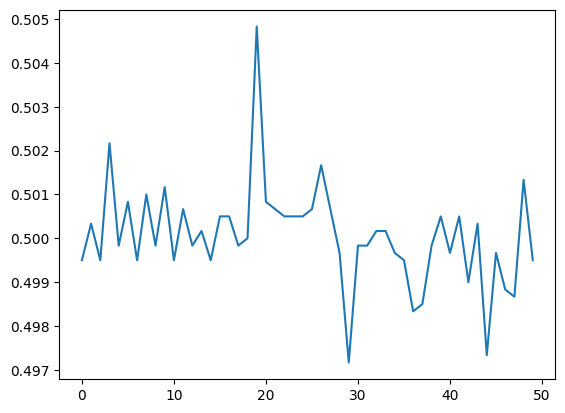

In [73]:
plt.plot(history.history['val_accuracy'])

# Data Scaling

In [74]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_Test), epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4933 - loss: 0.6977 - val_accuracy: 0.4980 - val_loss: 0.6952
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5131 - loss: 0.6936 - val_accuracy: 0.5033 - val_loss: 0.6951
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5064 - loss: 0.6929 - val_accuracy: 0.4988 - val_loss: 0.6944
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5099 - loss: 0.6932 - val_accuracy: 0.5073 - val_loss: 0.6948
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5137 - loss: 0.6927 - val_accuracy: 0.4887 - val_loss: 0.6945
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5183 - loss: 0.6924 - val_accuracy: 0.4980 - val_loss: 0.6948
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5145 - loss: 0.6926 - val_accuracy: 0.4942 - val_loss: 0.6948
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5208 - loss: 0.6923 - val_accuracy: 0.4992 - val_

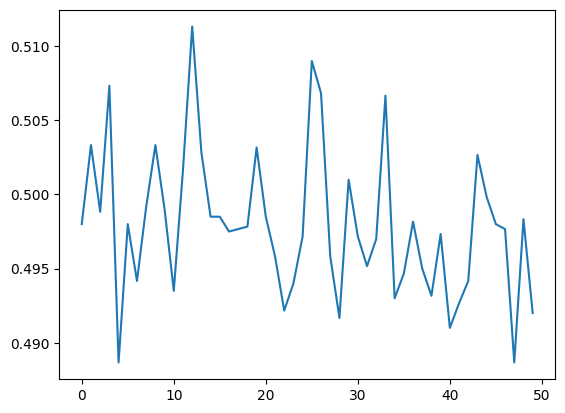

In [76]:
plt.plot(history.history['val_accuracy'])